In [7]:
#run this cell twice if using import_ipynb
import numpy as np
from IPython.display import Audio
import import_ipynb
%run hide_toggle.ipynb
from Lesson6_Synthesis_part1 import genSine
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
#hide_toggle()

# Synthesis
## Additive Synthesis Part 2

Below are some example functions for creating the four basic types of sound waves from additive synthesis.


**Importantly, ALL complex sounds can be represented as a sum of sinusoidal signals or *components*.** 
The process by which a complex wave is decomposed (broken up) into a set of component sinusoids is referred to as Fourier analysis. (Coming later in the semester.)

We can create simple "recipes" for the most basic of complex waveforms, which are the combination of specific combinations of a fundamental sinusoid and various integer multiples (in Hz)

Below is a table for comparing the four types of waves we will discuss today, showing which harmonics are present and at which amplitudes:

| Waveshape | a1 | a2 | a3| a4| a5| a6| a7 | a8 | a9 | aN | General Rule |
| ---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |:---: | :------------------: |
| Sine | 1 | 0 | 0 | 0 | 0 |0 | 0 | 0 | 0 | ... | $f0$ only |
| Sawtooth | 1 | 1/2 | 1/3 | 1/4 | 1/5 | 1/6 | 1/7 | 1/8 | 1/9 | ... |$1/x$ |
| Square | 1 | 0 | 1/3 | 0 | 1/5 | 0 | 1/7 | 0 | 1/9 | ... |$1/x$ for odd $x$ |
| Triangle |  1 | 0 | -1/9 | 0 | 1/25 | 0 | -1/49 | 0 | 1/81 | ... |$1/x^2$ for odd $x$, alternating + and - | 

### Sawtooth Waves
The recipe for sawtooth waves is to add together sine waves that are integer multiples of the fundamental frequency. The amplitude for each new (added) frequency will be the inverse of that multiple. 




Let's begin by writing a simple function that will make use of our genSine function to combine sinusoids.

In [3]:
# Review numpy notebooks for how to use the "stack" function
import numpy as np
x = np.arange(1,11)
y = np.arange(11,1,-1)

z = np.stack((x,y), axis=0) #change axes between 0 and 1 to see effect
z

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 10,  9,  8,  7,  6,  5,  4,  3,  2]])

In [4]:
z.sum(axis=0)

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12])

In [5]:
def addSines(numSines = None, f0 = None, t=1):
    '''function that will take the genSine function, and add integer multiples to continuousy synthesize a new 
    waveform. 
    
    numSines = the number of integer multiples of our original sinusoid (1 = s x 1; 2 = s x 2; 3 = s x 3, etc.)
    f0 = parameter to pass to the original genSine function (i.e., the frequency of the original sinusoid.)'''
    
    int(numSines) if numSines > 0 else False
    
   
    f0s = f0 * np.arange(1,numSines+1)
    #OR:
    #f0s = [(f0 * i) for i in range(1,numSines+1)]
    #np.stack creates rows (or columns) of arrays so long as they are same length:
    saw = np.stack([genSine(f=i,t=t) for i in f0s])
    return saw.sum(axis=0)
    #OR:
    #return np.sum(saw, axis=0)
    
hide_toggle()

In [8]:
#Here I copy mine in manually because my genSine function was in a parallel subdirectory
def genSine(f=None, t=1, A=1, phi=0, fs=44100):
    """
    Inputs:
    A (float) = amplitude of the sinusoid
    f (float) = frequency of the sinusoid in Hz
    phi (float) = initial phase of the sinusoid in radians
    fs (float) = sampling frequency of the sinusoid in Hz
    t (float) = duration of the sinusoid (in seconds)
    Output:
    The function should return a numpy array
    x (numpy array) = The generated sinusoid (use np.cos())
    """
    import numpy as np
    A = float(A)
    f = float(f) 
    float(phi)
    fs = float(fs)
    t = float(t) 
    
    x = A * np.sin(2*np.pi*f*np.arange(0,t,1/fs) + phi)
    return(x)

In [8]:
addSines(10, 5)


array([ 0.        ,  0.03918068,  0.07836026, ..., -0.11753766,
       -0.07836026, -0.03918068])

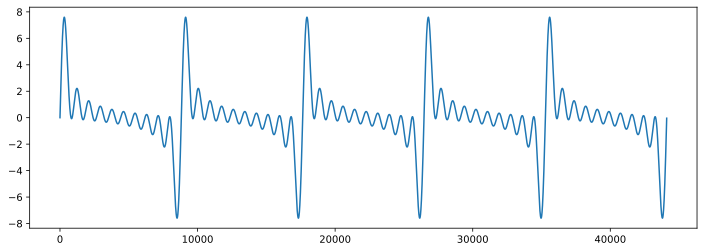

In [10]:
import matplotlib.pyplot as plt
plt.plot(addSines(10,5))

OK, so notice what's happening along the y-axis here with regard to amplitude. We are effectively generating what approaches a (inverse) sawtooth wave. Of course, when we add the waves together, the amplitudes get larger and larger. In this case, we summed of all the harmonics without scaling their amplitudes (we added all the sine components but each with equal amplitudes). The size of the amplitudes is supposed to shrink each time by a factor of 1/n where n is the integer multiple. So, we should modify our function...

*Note: The following hidden cells can be helpful to review if you didn't read the stuff about multidimensional arrays in numpy:*

In [ ]:
a = np.array([[0,1,2,3,4],[5,6,7,8,9]])
b = np.array([1,2])
c = b.reshape(2,1)
#print(c)
hide_toggle()

In [ ]:
d = a*c
#print(d)
hide_toggle()

In [ ]:
def approach_saw(numSines=None, f0=None, t=1):
    '''function that will take the genSine function, and add integer multiples to synthesize a new 
    sawtooth-like waveform. 
    
    numSines = the number of integer multiples of our original sinusoid (1 = s x 1; 2 = s x 2; 3 = s x 3, etc.)
    f0 = parameter to pass to the original genSine function (i.e., the frequency of the original sinusoid.)'''
    
    int(numSines) if numSines > 0 else False
    #Option 1: using list comprehensions with a zip iterator
    
#     mults = np.arange(1,numSines+1)
#     f0s = list(mults * f0)
#     As = list(1/mults)
#     saw = np.stack([genSine(f = i, A = j, t = t) for (i,j) in zip(f0s,As)])
    
    
    #OR: Option 2: multiplying matrices (i.e., multidimensional arrays)
    
    #list of integer multiples starting with fundamental (1)
    mults = np.arange(1,numSines+1)
    #1-dim array of amplitudes for each successive harmonic
    As = 1/mults
    #multiply fundamental by array of harmonics 
    freqs = mults * f0
    #generate multidimensional array of sinusoids all at amplitude 1
    sines = np.stack([genSine(f = i, A = 1, t = t) for i in freqs])
    #multiply 1d-array of amplitudes by multidimensional array of sinusoids to scale amplidudes
    saw = As.reshape(numSines,1)*sines
    
    return np.sum(saw, axis=0)

In [ ]:
x = approach_saw(10,5,1) #10 integer multiples of 5hz tone over 1 second
t = np.arange(x.size)/44100 
plt.plot(t,x) # plotted with respect to time instead of samples.

We can make a bit longer sawtooth wave, and then play it. Because there are a lot of harmonics, we have to be careful with amplitude, so we'll scale it down **and listen on computer with LOW volume first!**

In [ ]:
# OK, but we can't hear a 5Hz tone, so let's go back to our 60Hz tone and hear the difference...
x = approach_saw(10,60,1) #10 integer multiples of 60hz tone over 1 seconds
plt.plot(t, x)

The more multiples we give, the harsher the sound, because the more harmonics are being added. The fewer multiples we add, the closer to a sine wave. (Careful: A sound with more harmonics will be louder than a sound with fewer harmonics! The `Audio` function is automatically normalizing, but it's still a good idea to keep volume down since a sine will be much quieter than a saw, and higher frequencies will sound louder than lower ones)

In [ ]:
x = approach_saw(10,60,2) #increase to two seconds for listening
Audio(x, rate=44100)

Listen to how the timbre changes as you add more and more harmonics....

In [ ]:
x = approach_saw(20,60,2) #increase to two seconds for listening
Audio(x, rate=44100)

In [ ]:
x = approach_saw(20,1000,2) #increase to 1000 Hz and two seconds for listening
Audio(x, rate=44100)

### Square and Triangle Waves

Both square and triangle waves have no even-numbered harmonics. They are made up only of odd-numbered harmonics. The difference between the two is in the amplitude curves of the harmonics (or the magnitude of each harmonic present). Triangle waves have a much sharper cutoff in the amplitudes of the harmonics. While it also only has odd harmonics, every-other harmonic present is 180 degrees out of phrase. 

We can make a square wave function by modifying our sawtooth function to only include the odd-numbered harmonics:

In [9]:
def wav_square(numSines=None, f0=None, t=1):
    '''function that will take the genSine function, and add integer multiples to synthesize a new square
    waveform. 
    
    numSines = the number of integer multiples of our original sinusoid (1 = s x 1; 2 = s x 2; 3 = s x 3, etc.)
    f0 = parameter to pass to the original genSine function (i.e., the frequency of the original sinusoid.)'''
    import numpy as np
    
    #list of integer multiples starting with fundamental (1) but EVERY OTHER
    mults = np.arange(1,numSines+1,2)
    #1-dim array of amplitudes for each successive harmonic
    As = 1/mults
    #multiply fundamental by array of harmonics and convert to iterable
    freqs = mults * f0
    #generate multidimensional array of sinusoids all at amplitude 1
    sines = np.stack([genSine(f = i, A = 1, t = t) for i in freqs])
    #multiply 1d-array of amplitudes by multidimensional array of sinusoids to scale amplidudes
    saw = As.reshape(As.size,1)*sines
    
    return np.sum(saw, axis=0)
    

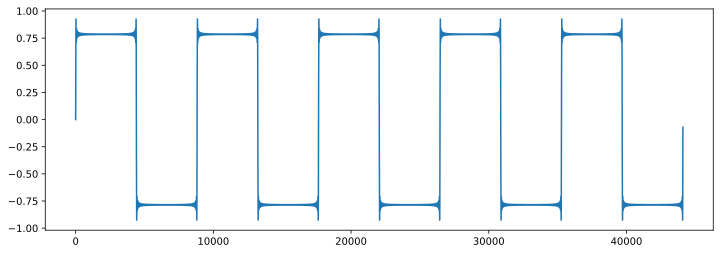

In [10]:
plt.plot(wav_square(200,5))

In [ ]:
Audio(wav_square(200,100), rate=44100)

In [ ]:
def wav_triangle(numSines=None, f0=None, t=1):
    '''function that will take the genSine function, and add integer multiples to synthesize a new square
    waveform. 
    
    numSines = the number of integer multiples of our original sinusoid (1 = s x 1; 2 = s x 2; 3 = s x 3, etc.)
    f0 = parameter to pass to the original genSine function (i.e., the frequency of the original sinusoid.)'''
    import numpy as np
    int(numSines) if numSines > 0 else False
    #only need to calculate every-other harmonic:
    freqs = f0* np.arange(1,numSines+1,2)
    #for now, this is easiest convert list-comprehension output to array:
    As = np.array([1/((-1)**i * (2*i+1)**2) for i in range(0, len(freqs))])
    sines = np.stack([genSine(f = i, A = 1, t = t, fs=10000) for i in freqs])
    tri = As.reshape(As.size,1)*sines
    return tri.sum(axis=0)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#plot 10Hz triangle wave
tri10 = wav_triangle(5,10)
plt.plot(np.linspace(0,1,44100),tri10)

In [ ]:
#make a 2s long 60 Hz tone so we can hear
tri60 = wav_triangle(5,1100,2)
Audio(tri60, rate=10000)